In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
sns.set_style("whitegrid")
pd.set_option("display.max_columns",None)

In [7]:
df = pd.read_csv("..\data\german_credit_data.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [8]:
df = df.drop(columns=["Unnamed: 0"])

In [9]:
df.head(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good


In [10]:
df.shape

(1000, 10)

In [11]:
df['Age'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [12]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [13]:
df["Saving accounts"].unique()

<StringArray>
[nan, 'little', 'quite rich', 'rich', 'moderate']
Length: 5, dtype: str

In [14]:
pd.crosstab(
    df["Saving accounts"],
    df["Risk"],
    normalize="index",
    dropna=False
)

Risk,bad,good
Saving accounts,,
little,0.359867,0.640133
moderate,0.330097,0.669903
quite rich,0.174603,0.825397
rich,0.125000,0.875000
NaN,0.174863,0.825137


In [15]:
df.groupby("Saving accounts", dropna=False)["Credit amount"].mean()

Saving accounts
little        3187.832504
moderate      3384.038835
quite rich    2572.111111
rich          2573.395833
NaN           3906.409836
Name: Credit amount, dtype: float64

In [16]:
df.groupby("Checking account", dropna=False)["Credit amount"].mean()

Checking account
little      3175.218978
moderate    3827.561338
rich        2177.650794
NaN         3133.101523
Name: Credit amount, dtype: float64

In [17]:
pd.crosstab(
    df["Checking account"],
    df["Risk"],
    normalize="index",
    dropna=False
)

Risk,bad,good
Checking account,,
little,0.492701,0.507299
moderate,0.390335,0.609665
rich,0.222222,0.777778
NaN,0.116751,0.883249


In [18]:
df = df.dropna()

In [19]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [20]:
df.shape

(522, 10)

In [21]:
df["Risk"].value_counts()

Risk
good    291
bad     231
Name: count, dtype: int64

In [22]:
df.info()

<class 'pandas.DataFrame'>
Index: 522 entries, 1 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               522 non-null    int64
 1   Sex               522 non-null    str  
 2   Job               522 non-null    int64
 3   Housing           522 non-null    str  
 4   Saving accounts   522 non-null    str  
 5   Checking account  522 non-null    str  
 6   Credit amount     522 non-null    int64
 7   Duration          522 non-null    int64
 8   Purpose           522 non-null    str  
 9   Risk              522 non-null    str  
dtypes: int64(4), str(6)
memory usage: 44.9 KB


In [23]:
df["Job"] = df["Job"].astype("str")

In [24]:
df.info()

<class 'pandas.DataFrame'>
Index: 522 entries, 1 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               522 non-null    int64
 1   Sex               522 non-null    str  
 2   Job               522 non-null    str  
 3   Housing           522 non-null    str  
 4   Saving accounts   522 non-null    str  
 5   Checking account  522 non-null    str  
 6   Credit amount     522 non-null    int64
 7   Duration          522 non-null    int64
 8   Purpose           522 non-null    str  
 9   Risk              522 non-null    str  
dtypes: int64(3), str(7)
memory usage: 44.9 KB


In [25]:
cat_cols = df.select_dtypes(include="object").columns
num_cols = df.select_dtypes(exclude="object").columns

for col in cat_cols:
    cats = df[col].unique().tolist()
    print(f"{col} -> {cats}")

Sex -> ['female', 'male']
Job -> ['2', '3', '1', '0']
Housing -> ['own', 'free', 'rent']
Saving accounts -> ['little', 'moderate', 'quite rich', 'rich']
Checking account -> ['moderate', 'little', 'rich']
Purpose -> ['radio/TV', 'furniture/equipment', 'car', 'business', 'domestic appliances', 'repairs', 'vacation/others', 'education']
Risk -> ['bad', 'good']


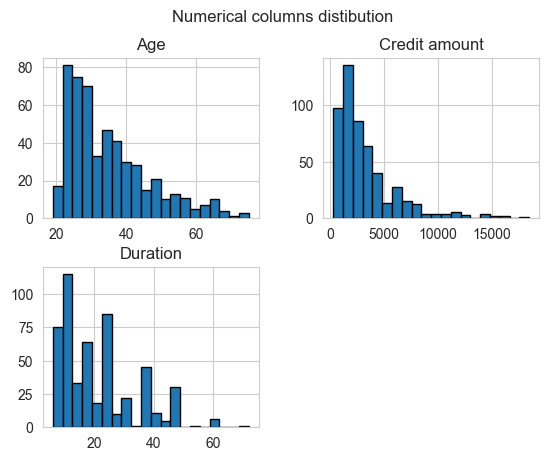

In [26]:
df[num_cols].hist(bins=20, edgecolor='black')
plt.suptitle("Numerical columns distibution")
plt.show()

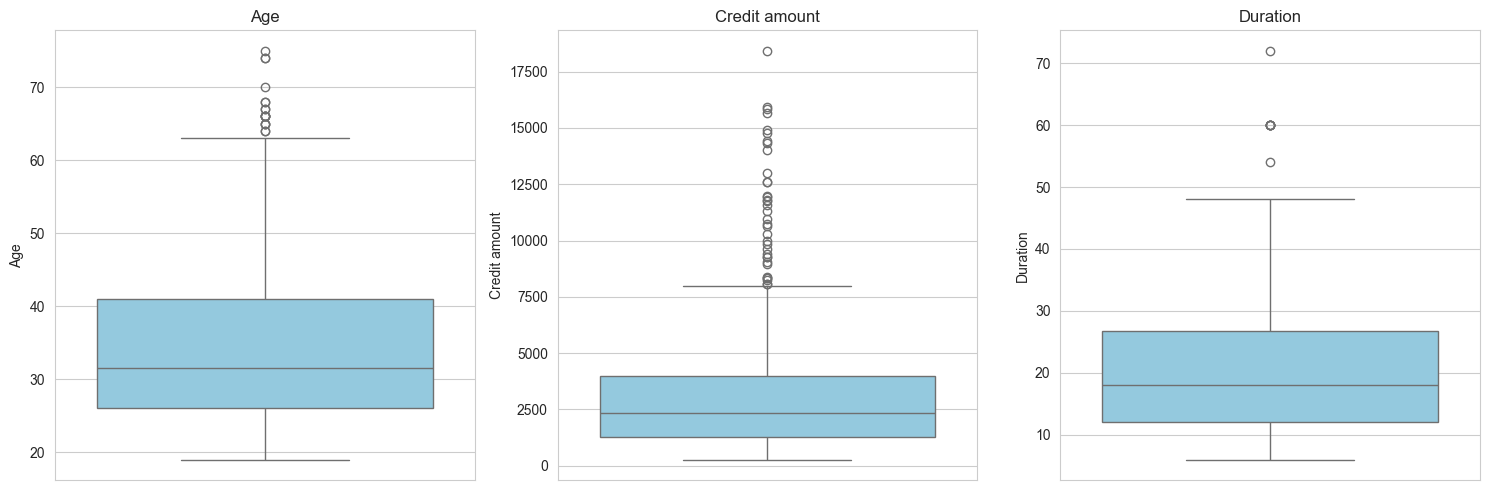

In [27]:
plt.figure(figsize=(15,5))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y = df[col], color = "skyblue")
    plt.title(col)

plt.tight_layout()
plt.show()

In [28]:
len(cat_cols)

7

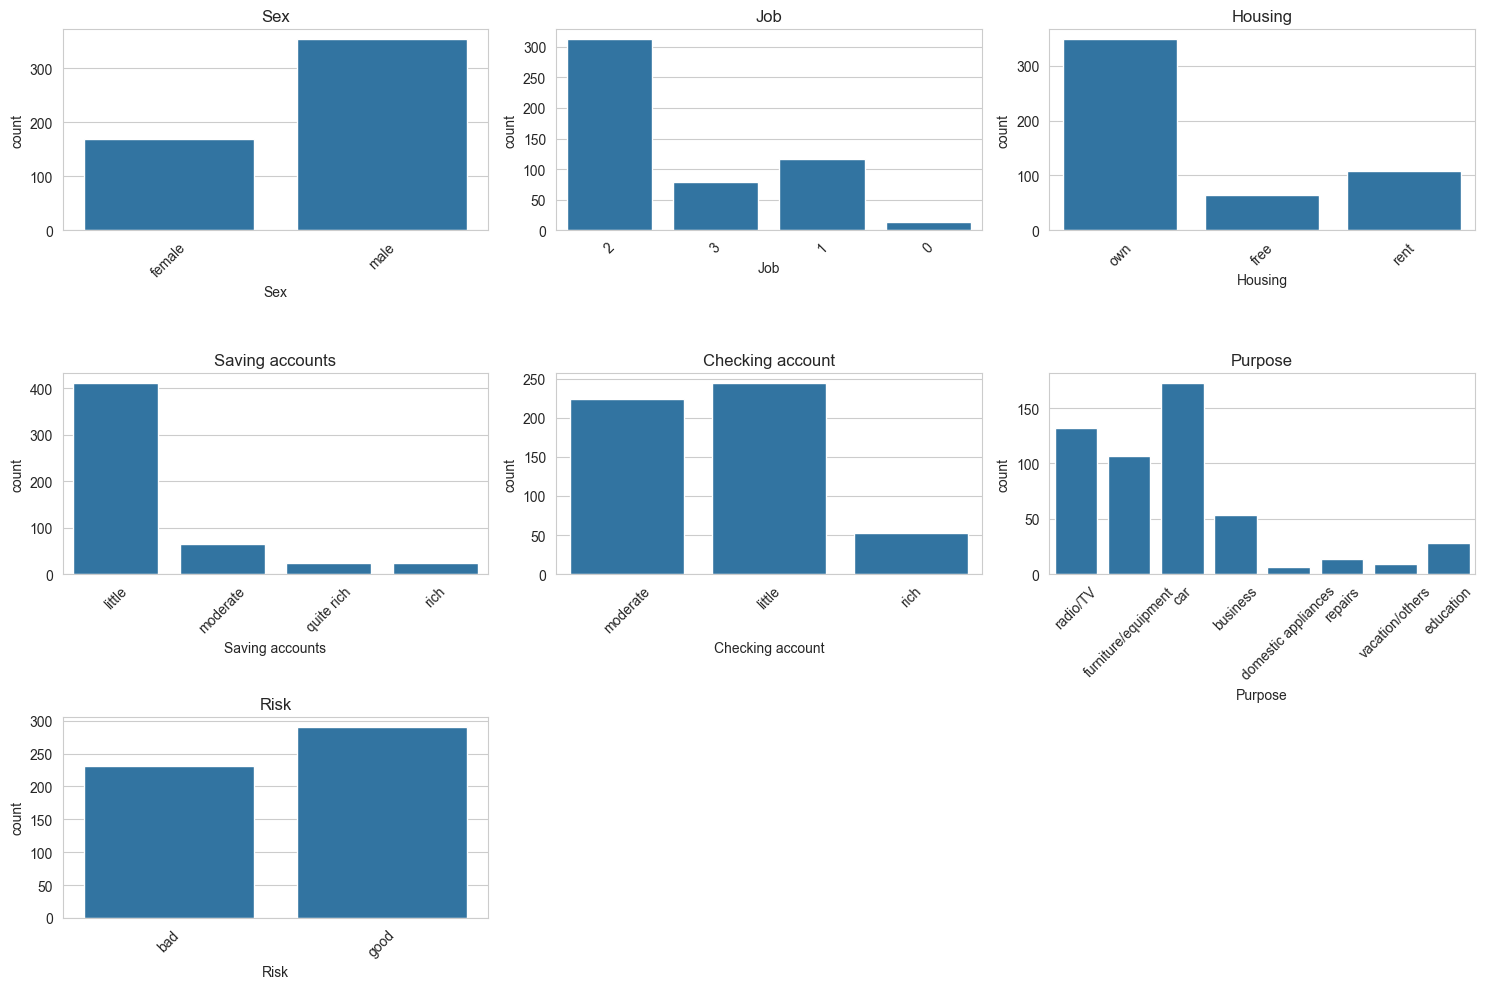

In [29]:
plt.figure(figsize=(15,10))
for i, col in enumerate(cat_cols):
    plt.subplot(3,3, i + 1)
    sns.countplot(x= df[col])
    plt.title(col)
    plt.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [30]:
df.query("Duration>=60").shape

(7, 10)

In [31]:
df[df["Sex"]=="male"]["Risk"].value_counts()

Risk
good    205
bad     149
Name: count, dtype: int64

In [32]:
df[df["Housing"]=="own"]["Risk"].value_counts()

Risk
good    210
bad     139
Name: count, dtype: int64

In [33]:
df.groupby("Housing")["Risk"].value_counts()

Housing  Risk
free     bad      36
         good     29
own      good    210
         bad     139
rent     bad      56
         good     52
Name: count, dtype: int64

In [34]:
corr= df[['Age','Job','Credit amount','Duration']].corr()
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


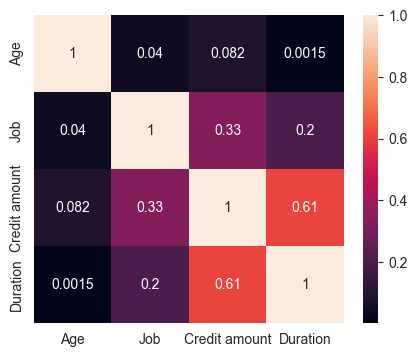

In [35]:
plt.figure(figsize=(5,4))
sns.heatmap(corr,annot=True)
plt.show()

In [36]:
df.groupby("Job")['Credit amount'].mean()

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [37]:
df.groupby("Job")['Duration'].mean()

Job
0    16.785714
1    16.922414
2    22.376997
3    24.518987
Name: Duration, dtype: float64

In [38]:
df.groupby("Sex")['Credit amount'].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [39]:
df.groupby("Housing")['Credit amount'].mean()

Housing
free    4846.384615
own     3003.504298
rent    3224.694444
Name: Credit amount, dtype: float64

In [40]:
pd.pivot_table(data=df,index="Housing",columns="Purpose",values="Credit amount")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


In [41]:
df.head(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


<Axes: xlabel='Saving accounts', ylabel='Credit amount'>

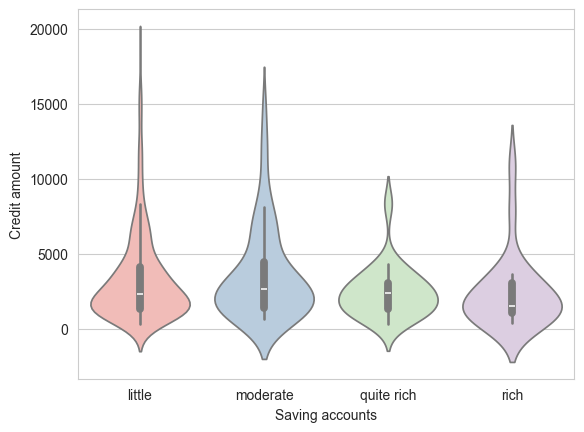

In [42]:
sns.violinplot(data=df, x="Saving accounts", y="Credit amount",palette="Pastel1")

In [43]:
df.groupby("Saving accounts")['Credit amount'].mean()

Saving accounts
little        3323.449029
moderate      3606.093750
quite rich    2424.913043
rich          2420.913043
Name: Credit amount, dtype: float64

In [44]:
df.groupby("Checking account")["Credit amount"].mean()

Checking account
little      3108.375510
moderate    3727.258929
rich        2170.698113
Name: Credit amount, dtype: float64

In [45]:
df['Risk'].value_counts(normalize=True)*100 ## percentage

Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

In [46]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
7,35,male,3,rent,little,moderate,6948,36,car,good
9,28,male,3,own,little,moderate,5234,30,car,bad


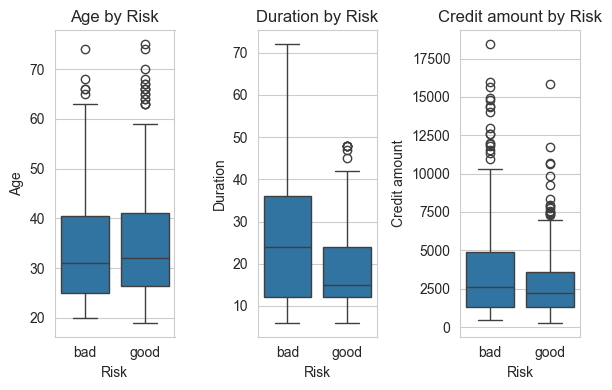

In [47]:
plt.figure(figsize=(6,4))
for i,col in enumerate(['Age','Duration','Credit amount']):
    plt.subplot(1,3,i+1)
    sns.boxplot(df, x='Risk', y=col)
    plt.title(f"{col} by Risk")

plt.tight_layout()
plt.show()

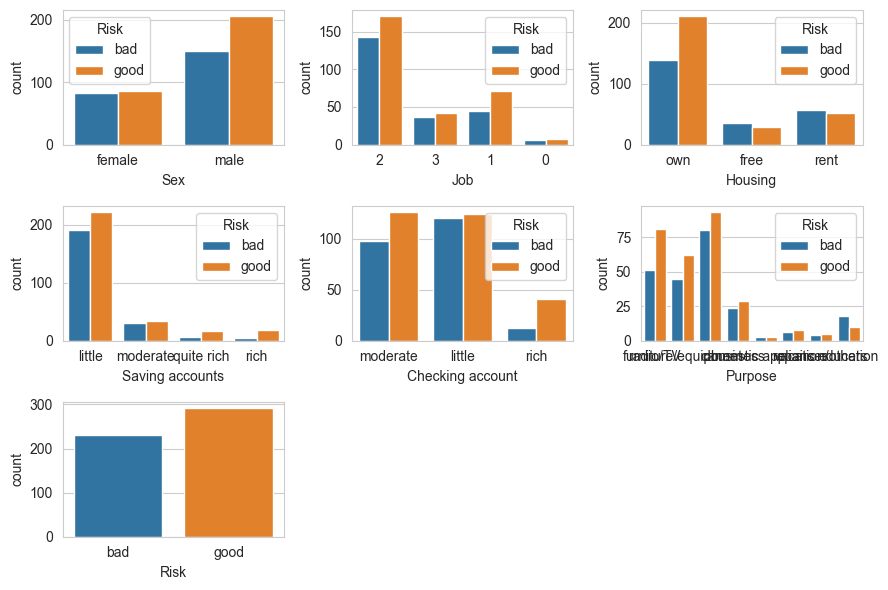

In [48]:
plt.figure(figsize=(9,6))
for i,col in enumerate(cat_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(df, x=col, hue='Risk')
plt.tight_layout()
plt.show()

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [51]:
X = df.drop("Risk", axis=1)
y = df["Risk"].map({"good":1, "bad":0})   # binary encoding target

In [83]:
X.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,22,female,2,own,little,moderate,5951,48,radio/TV
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
7,35,male,3,rent,little,moderate,6948,36,car
9,28,male,3,own,little,moderate,5234,30,car


In [84]:
y

1      0
3      1
4      0
7      1
9      0
      ..
989    1
993    1
996    1
998    0
999    1
Name: Risk, Length: 522, dtype: int64

In [85]:
num_cols = ["Age", "Credit amount", "Duration"]

nominal_cols = [
    "Sex",
    "Housing",
    "Saving accounts",
    "Checking account",
    "Purpose"
]

ordinal_cols = ["Job"]  # skill level

In [86]:
# 4. Preprocessing pipelines
# -------------------------
num_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

nominal_pipeline = Pipeline([
    ("onehot", OneHotEncoder(drop="first"))
])

ordinal_pipeline = Pipeline([
    ("ordinal", OrdinalEncoder())
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("nom", nominal_pipeline, nominal_cols),
    ("ord", ordinal_pipeline, ordinal_cols)
])


In [87]:

# -------------------------
# 5. Train-test split (before fit)
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [88]:
X_train.shape

(417, 9)

In [89]:
X_test.shape

(105, 9)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [90]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)

In [91]:
models = {
    "Logistic": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "SVM": SVC(),
    "DecisionTree": DecisionTreeClassifier(),
    
    # Boosting
    "AdaBoost": AdaBoostClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": LGBMClassifier(),
    "ExtraTrees": ExtraTreesClassifier()
}

In [106]:
def printPerformance(name,train_Accuracy,train_F1,train_Precision,train_Recall,train_ROC_AUC,test_Accuracy
                     ,test_F1,test_Precision,test_Recall,test_ROC_AUC):
    print(name)
    print("performance for Train set")
    print(f"- Accuracy: {train_Accuracy:.4f}")
    print(f"- F1 score: {train_F1:.4f}")
    print(f"- Precision: {train_Precision:.4f}")
    print(f"- Recall: {train_Recall:.4f}")
    print(f"- ROC AUC Score: {train_ROC_AUC:.4f}" if train_ROC_AUC is not None else "- ROC AUC Score: N/A")

    print("\nperformance for Test set")
    print(f"- Accuracy: {test_Accuracy:.4f}")
    print(f"- F1 score: {test_F1:.4f}")
    print(f"- Precision: {test_Precision:.4f}")
    print(f"- Recall: {test_Recall:.4f}")
    print(f"- ROC AUC Score: {test_ROC_AUC:.4f}" if test_ROC_AUC is not None else "- ROC AUC Score: N/A")

    print('='*20)
    print('\n')

In [107]:
train_results = {}
test_results={}

for name, model in models.items():
    
    pipe = Pipeline([
        ("prep", preprocessor),
        ("model", model)
    ])
    
    pipe.fit(X_train, y_train)
    
    # Predictions
    y_train_preds = pipe.predict(X_train)
    y_test_preds = pipe.predict(X_test)
    
    # Probabilities
    if hasattr(pipe, "predict_proba"):
        y_train_prob = pipe.predict_proba(X_train)[:, 1]
        y_test_prob = pipe.predict_proba(X_test)[:, 1]
    else:
        y_train_prob = None
        y_test_prob = None

    # ===== Training set performance =====
    train_Accuracy = accuracy_score(y_train, y_train_preds)
    train_Precision = precision_score(y_train, y_train_preds)
    train_Recall = recall_score(y_train, y_train_preds)
    train_F1 = f1_score(y_train, y_train_preds)
    train_ROC_AUC = roc_auc_score(y_train, y_train_prob) if y_train_prob is not None else None

    # ===== Test set performance =====
    test_Accuracy = accuracy_score(y_test, y_test_preds)
    test_Precision = precision_score(y_test, y_test_preds)
    test_Recall = recall_score(y_test, y_test_preds)
    test_F1 = f1_score(y_test, y_test_preds)
    test_ROC_AUC = roc_auc_score(y_test, y_test_prob) if y_test_prob is not None else None

    printPerformance(name,train_Accuracy,train_F1,train_Precision,train_Recall,train_ROC_AUC,test_Accuracy
                     ,test_F1,test_Precision,test_Recall,test_ROC_AUC)
    
    train_results[name] = {
        "Train_Accuracy": train_Accuracy,
        "Train_Precision": train_Precision,
        "Train_Recall": train_Recall,
        "Train_F1": train_F1,
        "Train_ROC_AUC": train_ROC_AUC
    }
    test_results[name]={
        "Test_Accuracy": test_Accuracy,
        "Test_Precision": test_Precision,
        "Test_Recall": test_Recall,
        "Test_F1": test_F1,
        "Test_ROC_AUC": test_ROC_AUC
    }


Logistic
performance for Train set
- Accuracy: 0.6811
- F1 score: 0.7313
- Precision: 0.6882
- Recall: 0.7802
- ROC AUC Score: 0.7342

performance for Test set
- Accuracy: 0.6095
- F1 score: 0.6822
- Precision: 0.6286
- Recall: 0.7458
- ROC AUC Score: 0.6231


RandomForest
performance for Train set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000

performance for Test set
- Accuracy: 0.6381
- F1 score: 0.6780
- Precision: 0.6780
- Recall: 0.6780
- ROC AUC Score: 0.6892


SVM
performance for Train set
- Accuracy: 0.7002
- F1 score: 0.7582
- Precision: 0.6877
- Recall: 0.8448
- ROC AUC Score: N/A

performance for Test set
- Accuracy: 0.6667
- F1 score: 0.7287
- Precision: 0.6714
- Recall: 0.7966
- ROC AUC Score: N/A


DecisionTree
performance for Train set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000

performance for Test set
- Accuracy: 0.5429
- F1 score: 0.6066
- Precision: 0.5873
- 

In [113]:
print("\ntrain Summary Metrics:")
pd.DataFrame(train_results).T.sort_values(by="Train_Recall", ascending=False)


train Summary Metrics:


,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Train_ROC_AUC
RandomForest,1.000000,1.000000,1.000000,1.000000,1.000000
ExtraTrees,1.000000,1.000000,1.000000,1.000000,1.000000
DecisionTree,1.000000,1.000000,1.000000,1.000000,1.000000
XGBoost,1.000000,1.000000,1.000000,1.000000,1.000000
LightGBM,0.964029,0.961702,0.974138,0.967880,0.993709
GradientBoosting,0.880096,0.888889,0.896552,0.892704,0.966764
SVM,0.700240,0.687719,0.844828,0.758221,NaN
Logistic,0.681055,0.688213,0.780172,0.731313,0.734226
AdaBoost,0.676259,0.699588,0.732759,0.715789,0.749231


In [112]:
print("\ntest Summary Metrics:")
pd.DataFrame(test_results).T.sort_values(by="Test_Recall", ascending=False)


test Summary Metrics:


,Test_Accuracy,Test_Precision,Test_Recall,Test_F1,Test_ROC_AUC
SVM,0.666667,0.671429,0.796610,0.728682,NaN
Logistic,0.609524,0.628571,0.745763,0.682171,0.623066
LightGBM,0.695238,0.721311,0.745763,0.733333,0.749079
GradientBoosting,0.657143,0.688525,0.711864,0.700000,0.671702
RandomForest,0.638095,0.677966,0.677966,0.677966,0.689204
XGBoost,0.619048,0.655738,0.677966,0.666667,0.698968
AdaBoost,0.609524,0.645161,0.677966,0.661157,0.638909
DecisionTree,0.542857,0.587302,0.627119,0.606557,0.530951
ExtraTrees,0.561905,0.618182,0.576271,0.596491,0.616986


In [114]:
#hyperparameter tunning

In [123]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


log_reg_params = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-3, 3, 30),
    "solver": ["liblinear", "saga"]
}


rf_params = {
    "n_estimators": np.arange(200, 800, 100),
    "max_depth": [None] + list(np.arange(4, 20, 2)),
    "min_samples_split": np.arange(2, 10),
    "min_samples_leaf": np.arange(1, 6),
    "max_features": ["sqrt", "log2"]
}

xgb_params = {
    "n_estimators": np.arange(200, 800, 100),
    "learning_rate": np.linspace(0.03, 0.3, 30),
    "max_depth": np.arange(3, 10),
    "subsample": np.linspace(0.6, 1.0, 10),
    "colsample_bytree": np.linspace(0.6, 1.0, 10),
    "min_child_weight": np.arange(1, 6),
    "reg_alpha": np.linspace(0, 0.5, 10),
    "reg_lambda": np.linspace(0.5, 2, 10)
}

svm_params = {
    "C": np.logspace(-2, 2, 30),
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"] + list(np.logspace(-3, 1, 10))
}

gb_params = {
    "n_estimators": np.arange(150, 600, 50),
    "learning_rate": np.linspace(0.03, 0.3, 30),
    "max_depth": np.arange(2, 6),
    "min_samples_split": np.arange(2, 10),
    "min_samples_leaf": np.arange(1, 6),
    "subsample": np.linspace(0.6, 1.0, 10)
}

lgbm_params = {
    "n_estimators": [200, 400],
    "learning_rate": [0.05, 0.1],
    "num_leaves": [31, 63],
    "max_depth": [-1, 8],
    "min_child_samples": [20, 40],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}



In [131]:
from sklearn.model_selection import RandomizedSearchCV
randomcv_models = [
    # ("LogReg", LogisticRegression, log_reg_params),
    # ("SVM", SVC, svm_params),
    ("RF", RandomForestClassifier, rf_params),
    ("GB", GradientBoostingClassifier, gb_params),
    ("XGB", XGBClassifier, xgb_params),
    # ("LGBM", LGBMClassifier, lgbm_params),
]

In [132]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

best_models = {}
test_results = {}

for name, model, params in randomcv_models:
    
    pipe = Pipeline([
        ("prep", preprocessor),
        ("model", model())
    ])
    
    random_search = RandomizedSearchCV(
        estimator=pipe,
        param_distributions={f"model__{k}": v for k, v in params.items()},
        n_iter=50,
        scoring="recall",
        cv=5,
        n_jobs=-1,
        random_state=42
    )
    
    random_search.fit(X_train, y_train)
    
    # store best pipeline
    best_models[name] = random_search.best_estimator_
    
    # test prediction
    y_pred = random_search.predict(X_test)
    
    # metrics
    test_results[name] = {
        "Recall": recall_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "Accuracy": accuracy_score(y_test, y_pred)
    }
    
    print(f"{name} done")

RF done
GB done
XGB done


In [ ]:
for model_name, pipe in best_models.items():
    print(f"\n----------- Best params for {model_name} ----------------")
    print(pipe.named_steps["model"].get_params())


----------- Best params for RF ----------------
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': np.int64(4), 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': np.int64(4), 'min_samples_split': np.int64(6), 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': np.int64(700), 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

----------- Best params for GB ----------------
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': np.float64(0.11379310344827587), 'loss': 'log_loss', 'max_depth': np.int64(2), 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': np.int64(2), 'min_samples_split': np.int64(4), 'min_weight_fraction_leaf': 0.0, 'n_estimators': np.int64(250), 'n_iter_no_change': None, 'random_state': None, 'subsample': np.float64(0.7333333333

In [134]:
pd.DataFrame(test_results).T

,Recall,Precision,F1,Accuracy
RF,0.847458,0.657895,0.740741,0.666667
GB,0.762712,0.737705,0.750000,0.714286
XGB,0.813559,0.750000,0.780488,0.742857


In [156]:
models = {
    "XGBoost": XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        colsample_bytree=0.6888888888888889,
        learning_rate=0.03,
        max_depth=4,
        min_child_weight=4,
        n_estimators=200,
        reg_alpha=0.3333333333333333,
        reg_lambda=1.0,
        subsample=0.9111111111111111,
        use_label_encoder=False
    )
}

In [157]:
models

{'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.6888888888888889, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric='logloss', feature_types=None, feature_weights=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.03, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=4, max_leaves=None,
               min_child_weight=4, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=200, n_jobs=None,
               num_parallel_tree=None, ...)}

In [158]:
train_results = {}
test_results={}

for name, model in models.items():
    
    pipe = Pipeline([
        ("prep", preprocessor),
        ("model", model)
    ])
    
    pipe.fit(X_train, y_train)
    
    # Predictions
    y_train_preds = pipe.predict(X_train)
    y_test_preds = pipe.predict(X_test)
    
    # Probabilities
    if hasattr(pipe, "predict_proba"):
        y_train_prob = pipe.predict_proba(X_train)[:, 1]
        y_test_prob = pipe.predict_proba(X_test)[:, 1]
    else:
        y_train_prob = None
        y_test_prob = None

    # ===== Training set performance =====
    train_Accuracy = accuracy_score(y_train, y_train_preds)
    train_Precision = precision_score(y_train, y_train_preds)
    train_Recall = recall_score(y_train, y_train_preds)
    train_F1 = f1_score(y_train, y_train_preds)
    train_ROC_AUC = roc_auc_score(y_train, y_train_prob) if y_train_prob is not None else None

    # ===== Test set performance =====
    test_Accuracy = accuracy_score(y_test, y_test_preds)
    test_Precision = precision_score(y_test, y_test_preds)
    test_Recall = recall_score(y_test, y_test_preds)
    test_F1 = f1_score(y_test, y_test_preds)
    test_ROC_AUC = roc_auc_score(y_test, y_test_prob) if y_test_prob is not None else None

    printPerformance(name,train_Accuracy,train_F1,train_Precision,train_Recall,train_ROC_AUC,test_Accuracy
                     ,test_F1,test_Precision,test_Recall,test_ROC_AUC)
    
    # train_results[name] = {
    #     "Train_Accuracy": train_Accuracy,
    #     "Train_Precision": train_Precision,
    #     "Train_Recall": train_Recall,
    #     "Train_F1": train_F1,
    #     "Train_ROC_AUC": train_ROC_AUC
    # }
    # test_results[name]={
    #     "Test_Accuracy": test_Accuracy,
    #     "Test_Precision": test_Precision,
    #     "Test_Recall": test_Recall,
    #     "Test_F1": test_F1,
    #     "Test_ROC_AUC": test_ROC_AUC
    # }


XGBoost
performance for Train set
- Accuracy: 0.8225
- F1 score: 0.8465
- Precision: 0.8160
- Recall: 0.8793
- ROC AUC Score: 0.9014

performance for Test set
- Accuracy: 0.7429
- F1 score: 0.7805
- Precision: 0.7500
- Recall: 0.8136
- ROC AUC Score: 0.7594




In [159]:
pipe

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('prep', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('nom', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers conta

In [160]:
import os, joblib

os.makedirs("saved_models", exist_ok=True)
joblib.dump(pipe, "saved_models/Xgboost_model1.joblib")

['saved_models/Xgboost_model1.joblib']

In [183]:
#loading model and testing

In [164]:
import joblib

pipe_loaded = joblib.load("saved_models/Xgboost_model1.joblib")

y_predicted = pipe.predict(X_test)

In [165]:
test_Accuracy = accuracy_score(y_test, y_predicted)
test_Precision = precision_score(y_test, y_predicted)
test_Recall = recall_score(y_test, y_predicted)
test_F1 = f1_score(y_test, y_predicted)

In [166]:
test_Accuracy,test_Precision,test_Recall,test_F1

(0.7428571428571429, 0.75, 0.8135593220338984, 0.7804878048780488)

In [185]:
import pandas as pd

new_data = pd.DataFrame([{
    "Age": 35,
    "Credit amount": 4000,
    "Duration": 24,
    "Sex": "male",
    "Housing": "free",
    "Saving accounts": "rich",
    "Checking account": "rich",
    "Purpose": "car",
    "Job": "2"
}])

pred = pipe_loaded.predict(new_data)
prob = pipe_loaded.predict_proba(new_data)[:,1]

In [186]:
pred

array([1])

In [187]:
prob

array([0.7840864], dtype=float32)

In [188]:
prob[0]

np.float32(0.7840864)

In [189]:
pred = pipe_loaded.predict(new_data)
prob = pipe_loaded.predict_proba(new_data)[:,1]

pred_label = int(pred[0])
prob_good = float(prob[0])   # probability of class 1 (good)
prob_bad = 1 - prob_good

In [190]:
risk_prob = 1 - prob_good
print(f"Default risk: {risk_prob:.2%}")

Default risk: 21.59%
